<a href="https://www.kaggle.com/code/faressayah/knneighbors-private-vs-public-universities?scriptVersionId=117872950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# K Nearest Neighbors Project (Universities classification - Private vs Public)

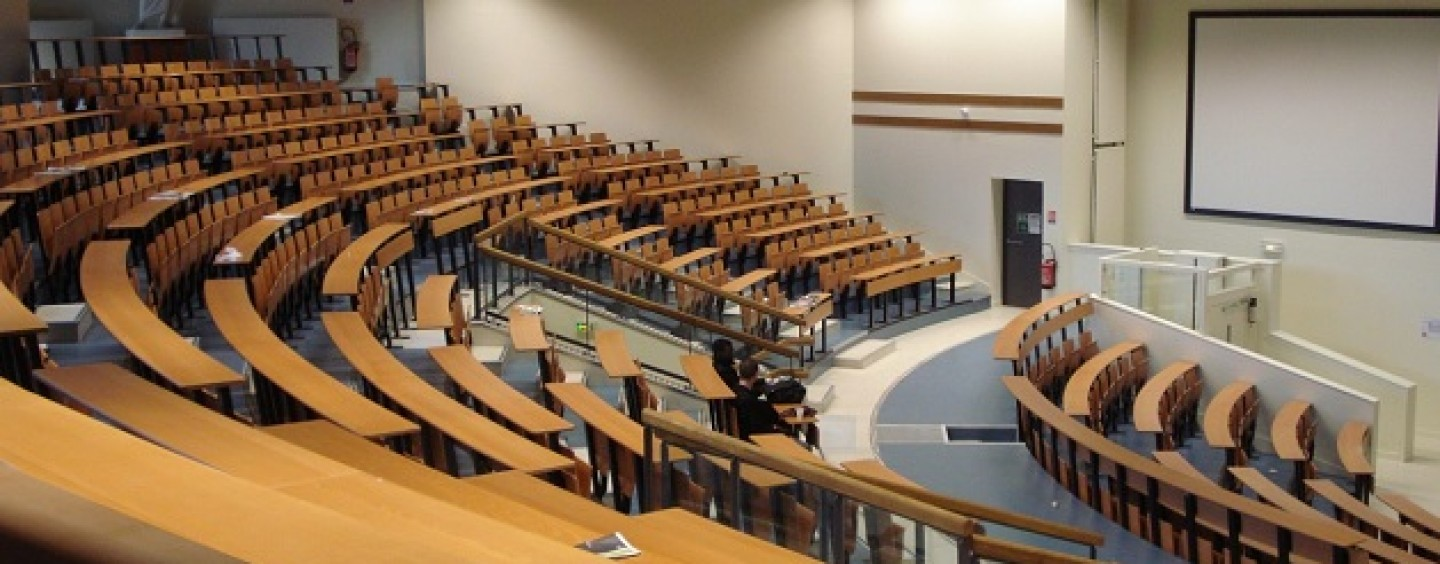

Classification and Regression

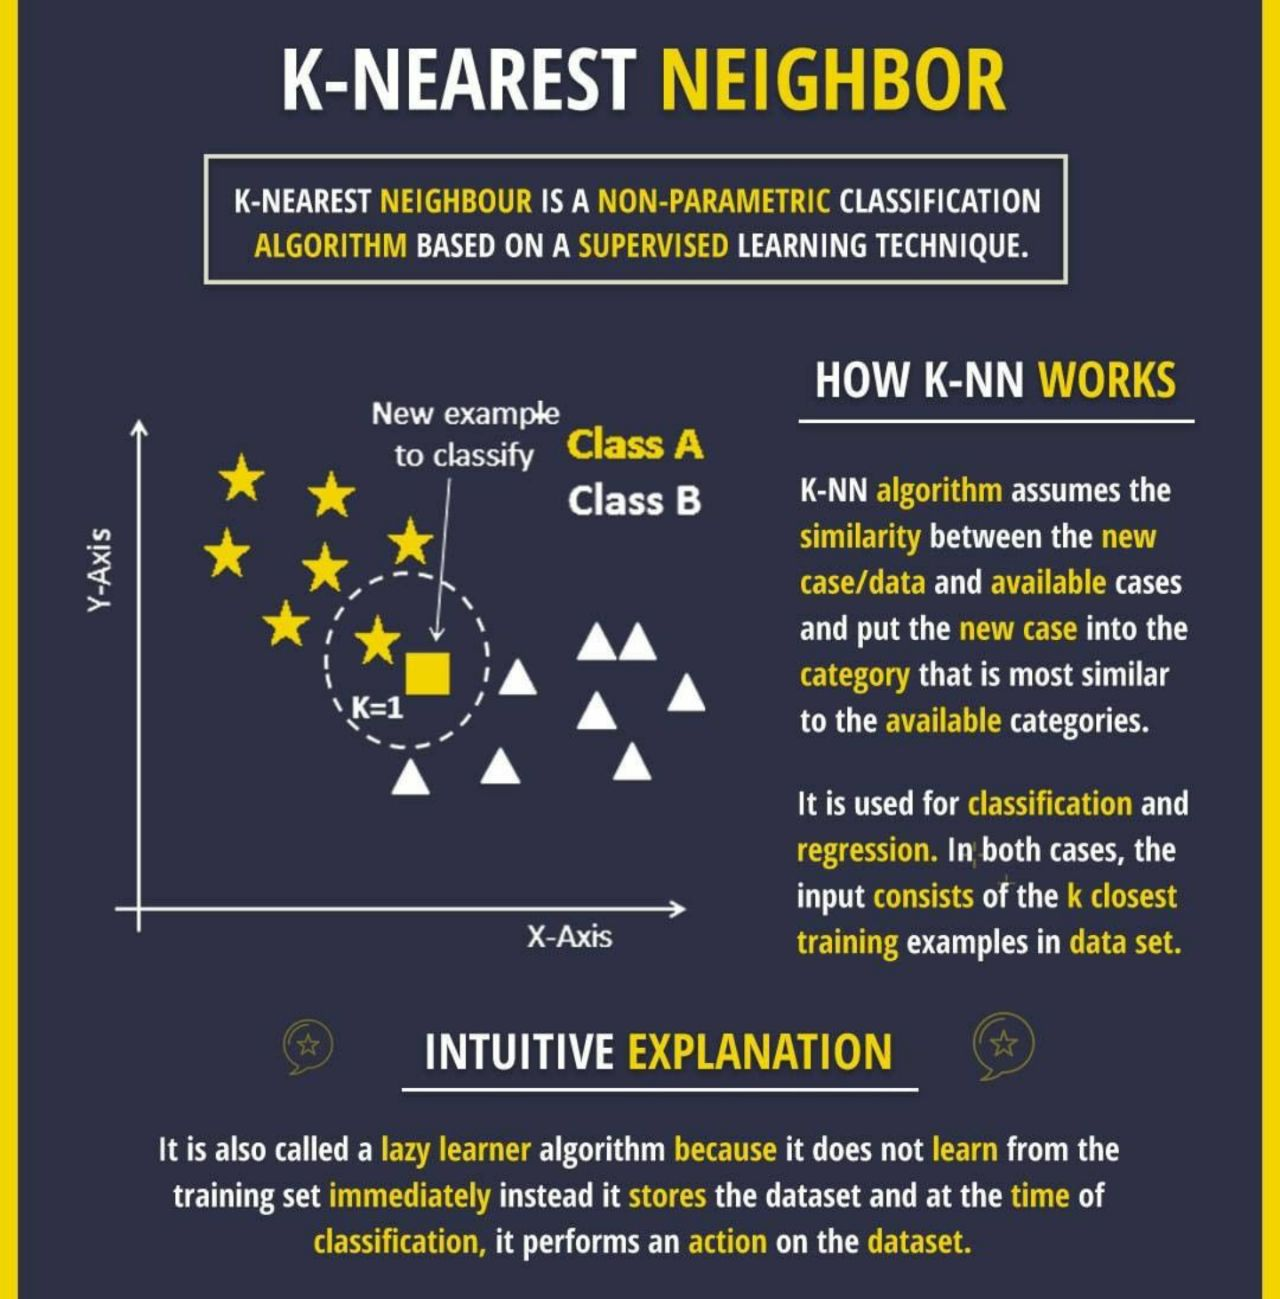

* Lazy learner

  * [Instance Based](https://en.wikipedia.org/wiki/Instance-based_learning)
  * Lazy because it does not try to learn a function from the training data. 
  * It memorise the pattern from the dataset


* [Nonparametric model](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

  * distribution-free tests because no assumption of the data needing to follow a specific distribution
  * [wikipedia](https://en.wikipedia.org/wiki/Nonparametric_statistics)
  * Other examples - Decision Tree, Random Forest



Used for:

* Predict cancer is malignant or benign
* Pattern recognition
* Recommender Systems
* Computer Vision
* Gene Expression
* Protein-Protein Interaction and 3D Structure Prediction


## Disadvantages

* Not efficient on big data
* Curse of dimensionality. Very susceptible to overfitting


## Steps:

* Choose the number of $k$
* Select a distance metric
* Find the k nearest neighbors of the sample
* Assign the class label by majority vote

# Making Predictions with KNN
KNN makes predictions using the training dataset directly.

Predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances.

To determine which of the K instances in the training dataset are most similar to a new input a distance measure is used.

Metrics intended for real-valued vector spaces:

| identifier	| class name	| args	| distance function |
|:- |:- |:- |:- |
|“euclidean” | 	EuclideanDistance  |   | $\sqrt{\sum(x - y)^2)}$  |  
|“manhattan” | ManhattanDistance |  | $\sum\big|x - y\big|$|  
|“chebyshev” | ChebyshevDistance |  | max${\big|x - y\big|}$ |  
|“minkowski” | MinkowskiDistance	 | p	 | $\sum(\big|x - y\big|^p)^{\frac{1}{p}}$     | 
|“wminkowski” | WMinkowskiDistance	 | p, w	 | $\sum(w\big|x - y\big|^p)^{\frac{1}{p}}$     |
|“seuclidean” | SEuclideanDistance	 | V	 | $\sqrt{\sum\frac{(x - y)^2}{V})}$     | 

# Best Prepare Data for KNN
- **Rescale Data:** KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution.
- **Address Missing Data:** Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.
- **Lower Dimensionality:** KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

## Get the Data

In [2]:
data = pd.read_csv("/kaggle/input/college-data/data.csv")
data.columns = data.columns.str.lower()
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Exploratory Data Analysis (EDA)

In [3]:
pd.set_option('display.float_format', '{:.4}'.format)
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0
mean,3.002e+03,2.019e+03,780.0,27.56,55.8,3.7e+03,855.3,1.044e+04,4.358e+03,549.4,1.341e+03,72.66,79.7,14.09,22.74,9.66e+03,65.46
std,3.87e+03,2.451e+03,929.2,17.64,19.8,4.85e+03,1.522e+03,4.023e+03,1.097e+03,165.1,677.1,16.33,14.72,3.958,12.39,5.222e+03,17.18
min,81.0,72.0,35.0,1.0,9.0,139.0,1.0,2.34e+03,1.78e+03,96.0,250.0,8.0,24.0,2.5,0.0,3.186e+03,10.0
25%,776.0,604.0,242.0,15.0,41.0,992.0,95.0,7.32e+03,3.597e+03,470.0,850.0,62.0,71.0,11.5,13.0,6.751e+03,53.0
50%,1.558e+03,1.11e+03,434.0,23.0,54.0,1.707e+03,353.0,9.99e+03,4.2e+03,500.0,1.2e+03,75.0,82.0,13.6,21.0,8.377e+03,65.0
75%,3.624e+03,2.424e+03,902.0,35.0,69.0,4.005e+03,967.0,1.292e+04,5.05e+03,600.0,1.7e+03,85.0,92.0,16.5,31.0,1.083e+04,78.0
max,4.809e+04,2.633e+04,6.392e+03,96.0,100.0,3.164e+04,2.184e+04,2.17e+04,8.124e+03,2.34e+03,6.8e+03,103.0,100.0,39.8,64.0,5.623e+04,118.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
data.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

<AxesSubplot:xlabel='room_board', ylabel='grad_rate'>

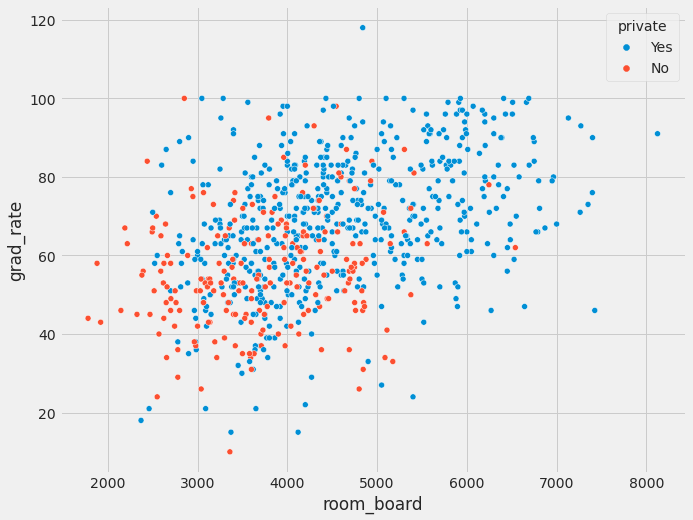

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

<AxesSubplot:xlabel='outstate', ylabel='f_undergrad'>

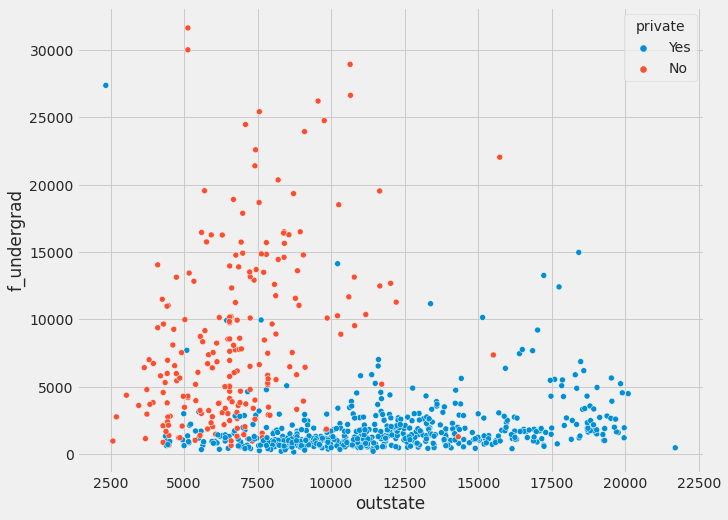

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

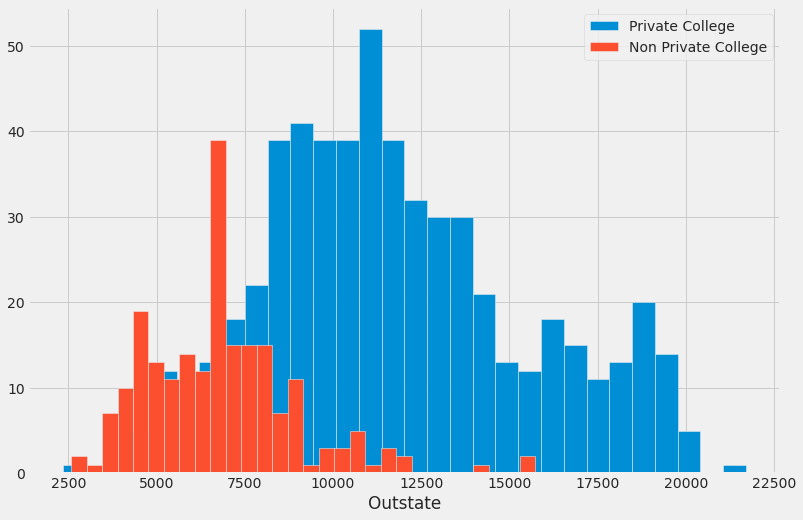

In [8]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

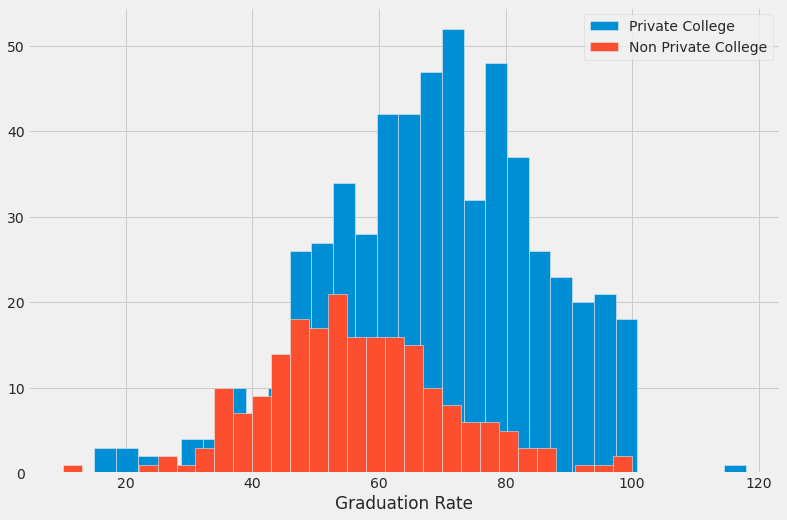

In [9]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [10]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.

In [11]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

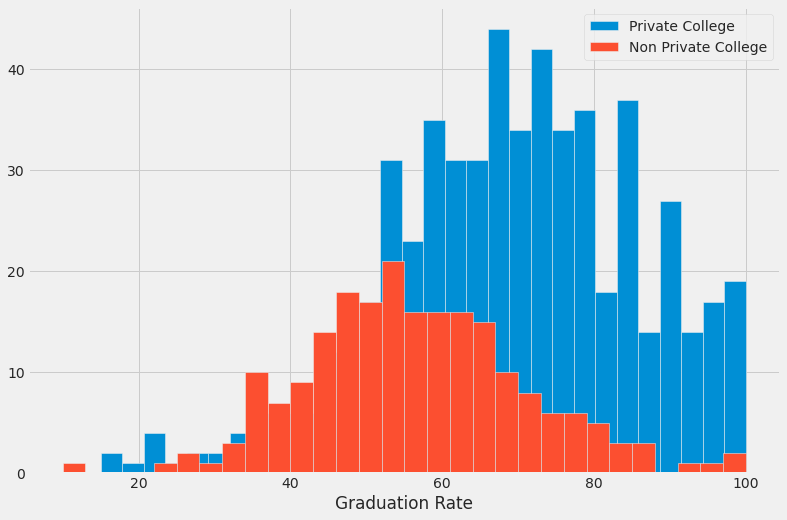

In [12]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

# Train test split

In [13]:
data.private.value_counts()

Yes    565
No     212
Name: private, dtype: int64

# Standardize the Variables

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(['private'], axis=1)
y = data.private

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
evaluate(knn_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[148   0]
 [ 19 376]]
ACCURACY SCORE:
0.9650
CLASSIFICATION REPORT:
              No    Yes  accuracy  macro avg  weighted avg
precision 0.8862    1.0     0.965     0.9431         0.969
recall       1.0 0.9519     0.965     0.9759         0.965
f1-score  0.9397 0.9754     0.965     0.9575        0.9656
support    148.0  395.0     0.965      543.0         543.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 55   9]
 [ 21 149]]
ACCURACY SCORE:
0.8718
CLASSIFICATION REPORT:
              No    Yes  accuracy  macro avg  weighted avg
precision 0.7237  0.943    0.8718     0.8334         0.883
recall    0.8594 0.8765    0.8718     0.8679        0.8718
f1-score  0.7857 0.9085    0.8718     0.8471        0.8749
support     64.0  170.0    0.8718      234.0         234.0


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [17]:
scores = []

for n in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

**Now create the following plot using the information from your for loop.**

Text(0.5, 0, 'K nearest neighbors')

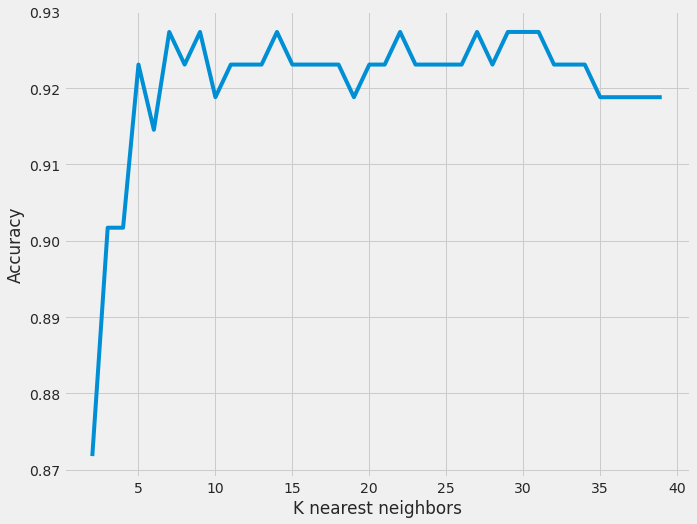

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 40), scores)
plt.ylabel("Accuracy")
plt.xlabel("K nearest neighbors")

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

evaluate(knn_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[127  21]
 [  8 387]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
              No    Yes  accuracy  macro avg  weighted avg
precision 0.9407 0.9485    0.9466     0.9446        0.9464
recall    0.8581 0.9797    0.9466     0.9189        0.9466
f1-score  0.8975 0.9639    0.9466     0.9307        0.9458
support    148.0  395.0    0.9466      543.0         543.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 54  10]
 [  7 163]]
ACCURACY SCORE:
0.9274
CLASSIFICATION REPORT:
              No    Yes  accuracy  macro avg  weighted avg
precision 0.8852 0.9422    0.9274     0.9137        0.9266
recall    0.8438 0.9588    0.9274     0.9013        0.9274
f1-score   0.864 0.9504    0.9274     0.9072        0.9268
support     64.0  170.0    0.9274      234.0         234.0


# Summary
In this post you discovered the KNN machine learning algorithm. You learned that:

- KNN stores the entire training dataset which it uses as its representation.
- KNN does not learn any model.
- KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.
- There are many distance measures to choose from to match the structure of your input data.
- That it is a good idea to rescale your data, such as using normalization, when using KNN.
- If you have any questions about this post or the KNN algorithm ask in the comments and I will do my best to answer.